## Neural Style Transfer

## Задача


Объединить две картинки, используя одну из них в качестве фильтра.

In [2]:
!pip install torch torchvision

#Загрузка датасета

In [3]:
!mkdir /root/.kaggle
!touch /root/.kaggle/kaggle.json
!echo '{"username":"nataliaafonina","key":"362b1fa4088ddc6937c685ff961b6ccf"}' > /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d burhanuddinlatsaheb/neural-style-transfer

 63% 2.00M/3.17M [00:00<00:00, 2.77MB/s]
100% 3.17M/3.17M [00:00<00:00, 3.51MB/s]


In [5]:
!unzip neural-style-transfer.zip

Archive:  neural-style-transfer.zip
  inflating: content1.jpg            
  inflating: content2.jpg            
  inflating: content3.jpeg           
  inflating: content4.jpg            
  inflating: content5.jpg            
  inflating: content6.jpg            
  inflating: content7.jpg            
  inflating: style1.jpg              
  inflating: style2.jpg              
  inflating: style3.jpg              
  inflating: style4.jpeg             
  inflating: style5.jpg              
  inflating: style6.jpg              
  inflating: style7.jpg              


## Загрузка VGG19

Для решения задачи воспользуемся параметрами из предобученной VGG19.

In [6]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:13<00:00, 43.6MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [8]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [9]:
dev = torch.device("cuda" if torch.cuda.is_available else "cpu")
print(dev)

cuda


In [10]:
vgg.to(dev)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Предобработка изображений

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [11]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size=500):
  image = Image.open(img_path).convert("RGB")
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  img_transforms = T.Compose([
      T.Resize(size),
      T.ToTensor(),
      T.Normalize(mean=[0.485, 0.456, 0.406],
                  std=[0.229, 0.224, 0.225])
  ])
  image = img_transforms(image)
  image = image.unsqueeze(0) # (3, 224, 224) -> (1, 3, 244, 244)

  return image

In [12]:
content_preprocess = preprocess("/content/content1.jpg")
style_preprocess = preprocess("/content/style1.jpg")

content_preprocess = content_preprocess.to(dev)
style_preprocess = style_preprocess.to(dev)

print(f"Content shape {content_preprocess.shape}")
print(f"Style shape {style_preprocess.shape}")

Content shape torch.Size([1, 3, 500, 916])
Style shape torch.Size([1, 3, 500, 666])


## Преобразование вектора в картинку

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to("cpu").clone()
  image = image.numpy()
  image = image.squeeze(0) # (1, 3, 224, 224) -> (3, 224, 224)
  image = image.transpose(1, 2, 0) # (3, 224, 224) -> (224, 224, 3)
  image = image * np.array([0.485, 0.456, 0.406]) + np.array([0.229, 0.224, 0.225])
  image = image.clip(0,1)

  return image


In [14]:
content_deproc = deprocess(content_preprocess)
style_deproc = deprocess(style_preprocess)

print(f"Deprocess content: {content_deproc.shape}")
print(f"Deprocess style: {style_deproc.shape}")

Deprocess content: (500, 916, 3)
Deprocess style: (500, 666, 3)


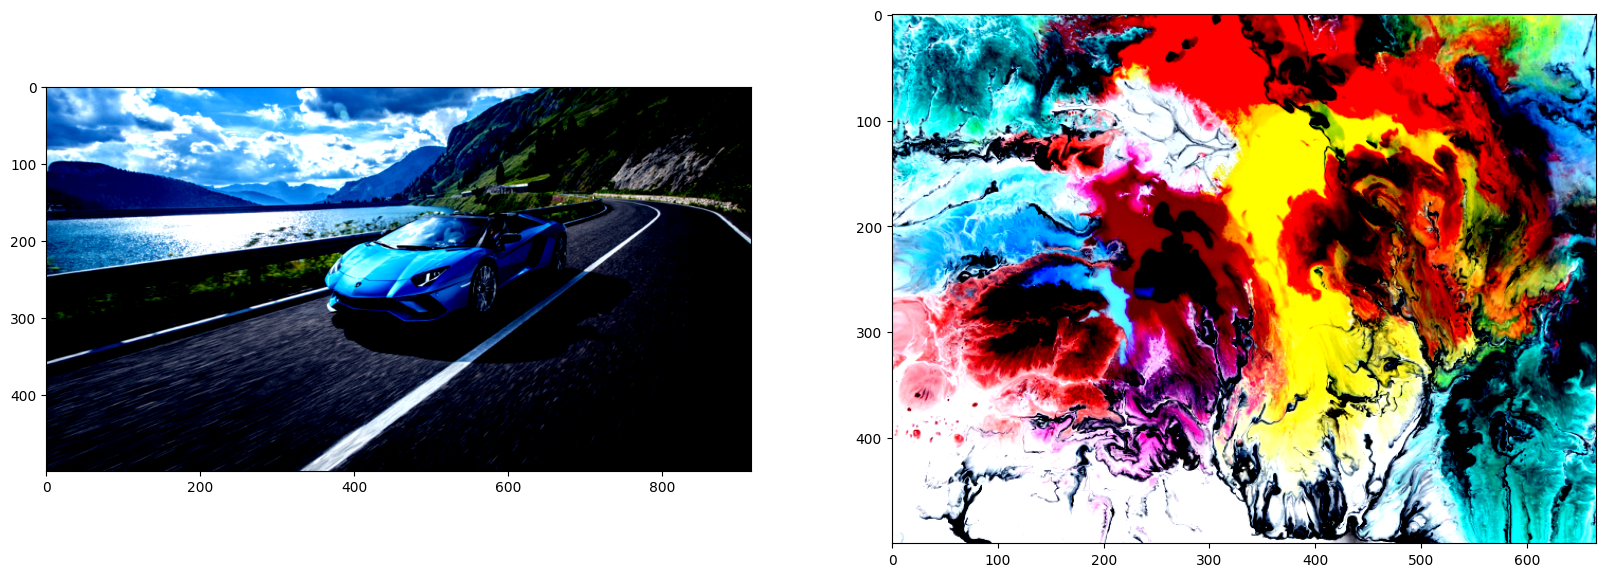

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(content_deproc)
ax2.imshow(style_deproc);

## Извлечение признаков из картинки и стиля, построение матрицы Грама

In [16]:
def get_features(image, model):
  layers = {
      "0": "conv1_1",  # see representaion.png
      "5": "conv2_1",
      "10": "conv3_1",
      "19": "conv4_1",
      "21": "conv4_2", #content_feature
      "28": "conv5_1"
  }

  x = image
  Features = {}
  for name, layer in model._modules.items():
    x = layer(x)
    if name in layers:
      Features[layers[name]] = x

  return Features

In [17]:
content_features = get_features(content_preprocess, vgg)
style_features = get_features(style_preprocess, vgg)

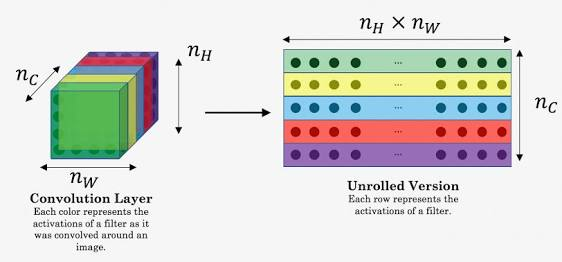

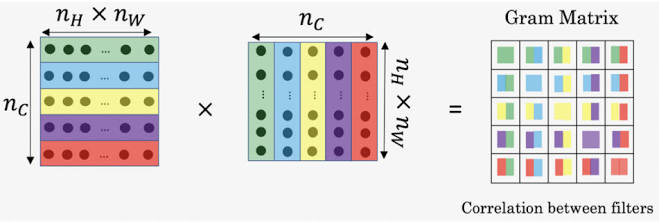

In [18]:
def gram_matrix(tensor):
  b, c, h, w = tensor.size()
  tensor = tensor.view(c, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [19]:
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

## Создание функций потерь для картинки и стиля

In [20]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss

In [21]:
style_weights = {
    "conv1_1": 1.0,
    "conv2_1": 0.75,
    "conv3_1": 0.75,
    "conv4_1": 0.75,
    "conv5_1": 0.75
}

In [22]:
def style_loss(style_weights, target_fs, style_grams):
  loss = 0
  for layer in style_weights:
    target_feature = target_fs[layer]
    target_gram = gram_matrix(target_feature)
    style_gram = style_grams[layer]
    b, c, h, w = target_feature.shape
    layer_loss = style_weights[layer]*torch.mean((target_gram-style_gram)**2)
    loss += layer_loss/(c*h*w)

  return loss

In [23]:
target = content_preprocess.clone().requires_grad_(True).to(dev)
target_f = get_features(target,vgg)
print(f"Content loss: {content_loss(target_f['conv4_1'], content_features['conv4_1'])}")
print(f"Style loss: {style_loss(style_weights, target_f,style_grams)}")

Content loss: 0.0
Style loss: 883.7786865234375


## Обучение модели

In [24]:
from torch import optim

optimizer = optim.Adam([target],lr=0.003)

alpha = 1.0
beta = 1e5
epochs = 4000
show_every = 500

In [25]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha*c_loss + beta*s_loss
  return loss

In [25]:
results = []

for i in range(epochs):
  target_f = get_features(target,vgg)
  c_loss = content_loss(target_f["conv4_2"], content_features["conv4_2"])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss,s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print(f"Total loss at Epoch {i}: {t_loss}")
    results.append(deprocess(target.detach()))

Total loss at Epoch 0: 88377872.0
Total loss at Epoch 500: 6104425.5
Total loss at Epoch 1000: 2672054.0
Total loss at Epoch 1500: 1604615.625
Total loss at Epoch 2000: 1133413.875
Total loss at Epoch 2500: 802174.625
Total loss at Epoch 3000: 568116.125
Total loss at Epoch 3500: 419791.5


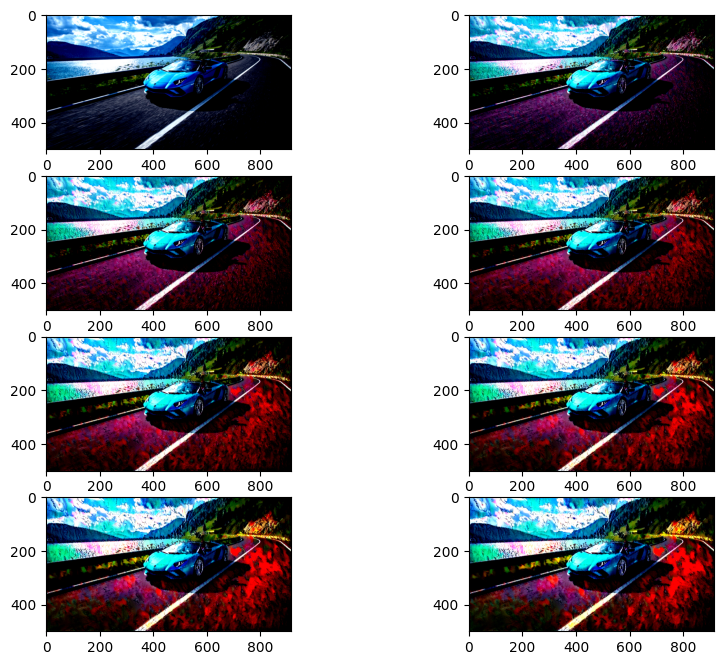

In [26]:
plt.figure(figsize=(10,8))
for i,_ in enumerate(results):
  plt.subplot(4,2, i+1)
  plt.imshow(results[i])
plt.show()

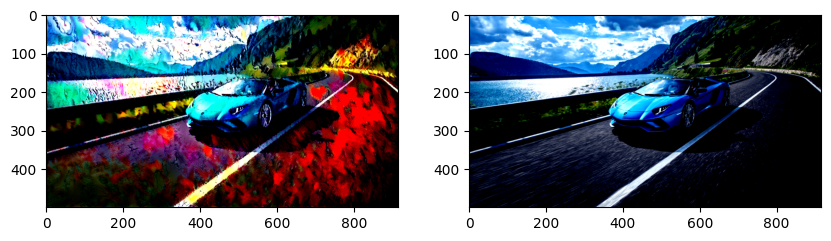

In [27]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_preprocess)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy);

#Улучшение качества результата

* Изменение весов style_weights
*Изменение коэффициентов alpha и beta
*Изменение параметров оптимизатора Adam lr=0.003
*Использование других оптимизаторов (например, SGD)
*Изменение числа эпох обучения
*Изменение размера изображения

In [26]:
style_weights_2 = {
    "conv1_1": 1.0,
    "conv2_1": 0.5,
    "conv3_1": 0.5,
    "conv4_1": 0.5,
    "conv5_1": 0.5
}

In [27]:
target = content_preprocess.clone().requires_grad_(True).to(dev)
target_f = get_features(target,vgg)
print(f"Content loss: {content_loss(target_f['conv4_2'], content_features['conv4_2'])}")
print(f"Style loss: {style_loss(style_weights_2, target_f,style_grams)}")

Content loss: 0.0
Style loss: 638.4769287109375


In [28]:
style_weights_3 = {
    "conv1_1": 1.0,
    "conv2_1": 0.9,
    "conv3_1": 0.9,
    "conv4_1": 0.5,
    "conv5_1": 0.5
}

In [29]:
target = content_preprocess.clone().requires_grad_(True).to(dev)
target_f = get_features(target,vgg)
print(f"Content loss: {content_loss(target_f['conv4_2'], content_features['conv4_2'])}")
print(f"Style loss: {style_loss(style_weights_3, target_f,style_grams)}")

Content loss: 0.0
Style loss: 1001.6547241210938


In [40]:
style_weights_4 = {
    "conv1_1": 0.6,
    "conv2_1": 0.4,
    "conv3_1": 0.2,
    "conv4_1": 0.2,
    "conv5_1": 0.1
}

In [41]:
target = content_preprocess.clone().requires_grad_(True).to(dev)
target_f = get_features(target,vgg)
print(f"Content loss: {content_loss(target_f['conv4_2'], content_features['conv4_2'])}")
print(f"Style loss: {style_loss(style_weights_4, target_f,style_grams)}")

Content loss: 0.0
Style loss: 349.1371765136719


In [49]:
optimizer_2 = optim.Adam([target],lr=0.002)

alpha_2 = 2.0
beta_2 = 1e4
epochs_2 = 5000
show_every_2 = 500

In [35]:
results_2 = []

for i in range(epochs_2):
  target_f = get_features(target,vgg)
  c_loss = content_loss(target_f["conv4_2"], content_features["conv4_2"])
  s_loss = style_loss(style_weights_2, target_f, style_grams)
  t_loss = total_loss(c_loss,s_loss, alpha_2, beta_2)

  optimizer_2.zero_grad()
  t_loss.backward()
  optimizer_2.step()

  if i % show_every_2 == 0:
    print(f"Total loss at Epoch {i}: {t_loss}")
    results_2.append(deprocess(target.detach()))

Total loss at Epoch 0: 38564.00390625
Total loss at Epoch 500: 29643.373046875
Total loss at Epoch 1000: 23611.19140625
Total loss at Epoch 1500: 19359.38671875
Total loss at Epoch 2000: 16304.1982421875
Total loss at Epoch 2500: 14035.1123046875
Total loss at Epoch 3000: 12263.7890625
Total loss at Epoch 3500: 10855.8505859375
Total loss at Epoch 4000: 9758.28125
Total loss at Epoch 4500: 8898.646484375


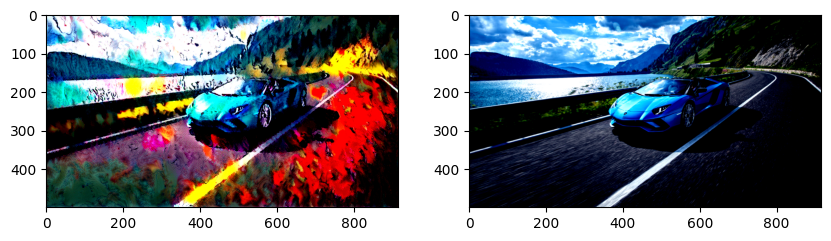

In [37]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_preprocess)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy);

In [43]:
optimizer_4 = optim.Adam([target],lr=0.002)

alpha_4 = 1.0
beta_4 = 1e6
epochs_4 = 3000
show_every_4 = 500

In [44]:
results_4 = []

for i in range(epochs_4):
  target_f = get_features(target,vgg)
  c_loss = content_loss(target_f["conv4_2"], content_features["conv4_2"])
  s_loss = style_loss(style_weights_4, target_f, style_grams)
  t_loss = total_loss(c_loss,s_loss, alpha_4, beta_4)

  optimizer_4.zero_grad()
  t_loss.backward()
  optimizer_4.step()

  if i % show_every_4 == 0:
    print(f"Total loss at Epoch {i}: {t_loss}")
    results_2.append(deprocess(target.detach()))

Total loss at Epoch 0: 349137184.0
Total loss at Epoch 500: 38078532.0
Total loss at Epoch 1000: 16808458.0
Total loss at Epoch 1500: 10064096.0
Total loss at Epoch 2000: 7214224.0
Total loss at Epoch 2500: 5295354.5


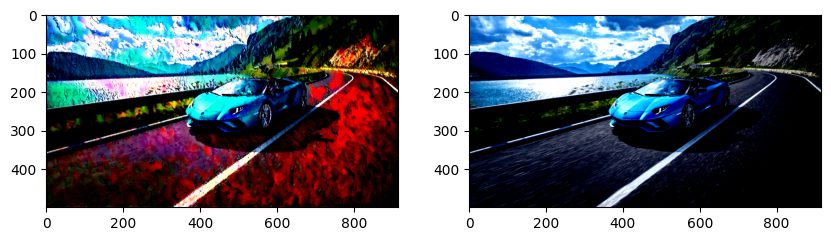

In [45]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_preprocess)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy);

In [50]:
# RMSprop
optimizer_rmsprop = optim.RMSprop([target], lr=0.003)

# Adagrad
optimizer_adagrad = optim.Adagrad([target], lr=0.003)

# Adadelta
optimizer_adadelta = optim.Adadelta([target], lr=1.0)

In [51]:
results_adagrad = []

for i in range(epochs_2):
  target_f = get_features(target,vgg)
  c_loss = content_loss(target_f["conv4_2"], content_features["conv4_2"])
  s_loss = style_loss(style_weights_2, target_f, style_grams)
  t_loss = total_loss(c_loss,s_loss, alpha_2, beta_2)

  optimizer_adagrad.zero_grad()
  t_loss.backward()
  optimizer_adagrad.step()

  if i % show_every_2 == 0:
    print(f"Total loss at Epoch {i}: {t_loss}")
    results_adagrad.append(deprocess(target.detach()))

Total loss at Epoch 0: 38508.5078125
Total loss at Epoch 500: 35259.7421875
Total loss at Epoch 1000: 33303.640625
Total loss at Epoch 1500: 31765.0625
Total loss at Epoch 2000: 30483.77734375
Total loss at Epoch 2500: 29381.08203125
Total loss at Epoch 3000: 28411.185546875
Total loss at Epoch 3500: 27546.314453125
Total loss at Epoch 4000: 26766.955078125
Total loss at Epoch 4500: 26059.03125


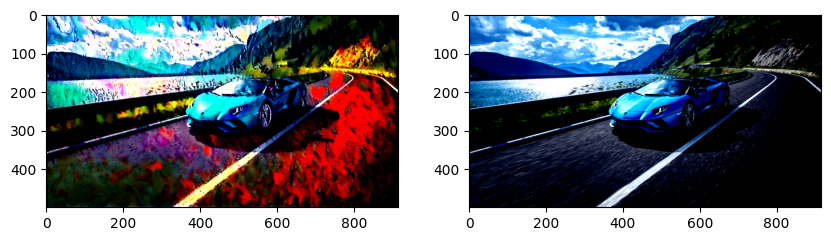

In [52]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_preprocess)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy);